In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Doctor_Train.xlsx")
df.sample(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
1741,"MBBS, MS - ENT",13 years experience,77%,"Kukatpally, Hyderabad",ENT Specialist,"77% 3 Feedback Kukatpally, Hyderabad",300
881,"BHMS, DHMS (Diploma in Homeopathic Medicine an...",8 years experience,NaN,"Malleswaram, Bangalore",Homeopath,NaN,500
3961,"BDS, MDS - Conservative Dentistry & Endodontics",5 years experience,100%,"Green Park, Delhi",Dentist,Scaling / Polishing Mouth Guard Dental prophyl...,500
4989,"MS - ENT, MBBS",23 years experience,NaN,"Old Rajendra Nagar, Delhi",ENT Specialist,NaN,700
4810,BDS,9 years experience,100%,"Borivali East, Mumbai",Dentist,Tooth Extraction Dental Fillings Ceramic Venee...,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


There are many missing values in Rating(an important column as name suggests) and Miscellaneous_Info which have descripive data in it, some values in Miscellaneous_Info columns are related to address and sone are related to the treatment they provide, but we have address as a separate column and Profile for knowing the treatment they provide.

We shall drop the column Miscellaneous_Info right away.

There are some missing values in column Place, so we can later understand about it what does it signifies in this dataset.

In [4]:
df.drop("Miscellaneous_Info",1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         2659 non-null   object
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


We have our target variable Fees which is the only numeric column, rest are categorical. We can;t infer much from categorical data, let's Encode them for the sake of understanding through varous EDA techniques.

In [6]:
for i in df.columns[:-1]:
    print("Number of unique values in {} is:".format(i),len(df[i].unique()))

Number of unique values in Qualification is: 1420
Number of unique values in Experience is: 64
Number of unique values in Rating is: 52
Number of unique values in Place is: 878
Number of unique values in Profile is: 6


In [7]:
df['ExperienceSplit'] = df['Experience'].str.split(" ", n = -1, expand = True)[0]
df['ExperienceSplit']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: ExperienceSplit, Length: 5961, dtype: object

In [8]:
#Dropping the unwanted values to keep only numeric value in column Experience
df['Experience'] = df['ExperienceSplit']
df.drop("ExperienceSplit",1,inplace=True)
df['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: object

In [9]:
#Dropping the '%' symbol to keep only numeric value in column Rating
df['Rating'] = df['Rating'].str.replace(r'\D', '')
df['Rating']

0       100
1        98
2       NaN
3       NaN
4       100
       ... 
5956     98
5957    NaN
5958     97
5959     90
5960    100
Name: Rating, Length: 5961, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         2659 non-null   object
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


In [11]:
#Converting the Experience data type to integer
df['Experience'] = df['Experience'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int64 
 2   Rating         2659 non-null   object
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 279.5+ KB


In [13]:
#Converting the Rating data type to float
df['Rating'] = df['Rating'].astype('float64')

In [14]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250


In [15]:
df[['Rating', 'Fees']].corr()

,Rating,Fees
Rating,1.000000,-0.133572
Fees,-0.133572,1.000000


As we can see that we have negative correlation between Fees and Rating, we can't just drop the column.

In [16]:
#Replacing the NaN values in Rating with the mean value of itself
df.loc[df['Rating'].isnull(), 'Rating'] = df['Rating'].mean()

In [17]:
df.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place            25
Profile           0
Fees              0
dtype: int64

In [18]:
#Drop Place
df.drop("Place",1,inplace=True)

In [19]:
df.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,94.643475,307.944640
std,11.142798,5.244204,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,94.643475,150.000000
50%,14.000000,94.643475,300.000000
75%,23.000000,96.000000,500.000000
max,66.000000,100.000000,950.000000


Dataset seems pretty spreadout, with no outliers

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   int64  
 2   Rating         5961 non-null   float64
 3   Profile        5961 non-null   object 
 4   Fees           5961 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 233.0+ KB


# Univariate Analysis

In [21]:
arr = []
for i in df.columns:
    if df[i].dtype != 'object':
        arr.append(i)
arr

['Experience', 'Rating', 'Fees']

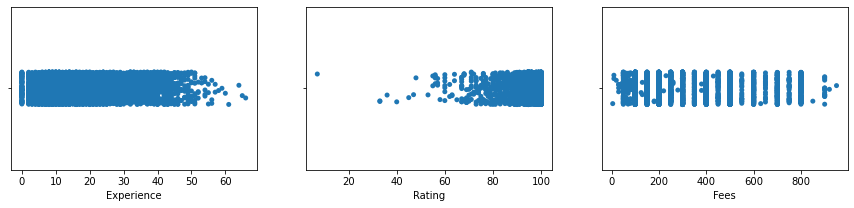

In [22]:
plt.figure(figsize=(15,3))
for i,j in enumerate(arr):
    plt.subplot(1,3,i+1)
    sns.stripplot(df[j])
plt.show()

Number of doctors with Experience more than 45 years are comparitively less.

Most of the doctors have rating more than 80

Fees seems pretty spreadout

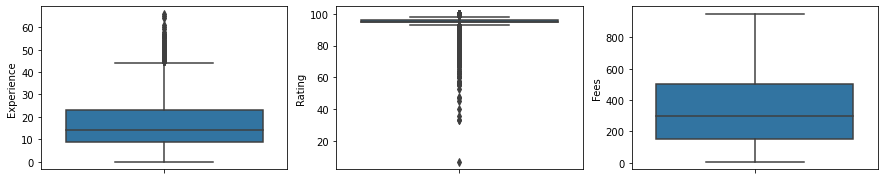

In [23]:
plt.figure(figsize=(15,3))
for i,j in enumerate(arr):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[j], orient="v")
plt.show()

We've huge outliers in Experience and Rating columns

There are very few outliers in Rating columns which seems outstanding, let's treat them using zscore method.

In [24]:
from scipy.stats import zscore

In [25]:
df['RatingZscore'] = zscore(df['Rating'])
df['RatingZscore']

0       1.021504e+00
1       6.400983e-01
2       2.710048e-15
3       2.710048e-15
4       1.021504e+00
            ...     
5956    6.400983e-01
5957    2.710048e-15
5958    4.493957e-01
5959   -8.855232e-01
5960    1.021504e+00
Name: RatingZscore, Length: 5961, dtype: float64

In [26]:
df['RatingZscore'].max()

1.0215037229554507

In [27]:
df['RatingZscore'].min()

-16.713846353466913

In [28]:
df.loc[df['RatingZscore'] < -5, 'RatingZscore'].count()

51

51 is approx 0.85% of the total dataset rows, we can remove them.

In [29]:
df_New = df[df['RatingZscore'] > -5]

In [30]:
df.shape

(5961, 6)

In [31]:
df_New.shape

(5910, 6)

In [32]:
df.shape[0] - df_New.shape[0]

51

We have removed 51 rows

In [33]:
df = df_New.copy()

In [34]:
df.drop("RatingZscore",1,inplace=True)

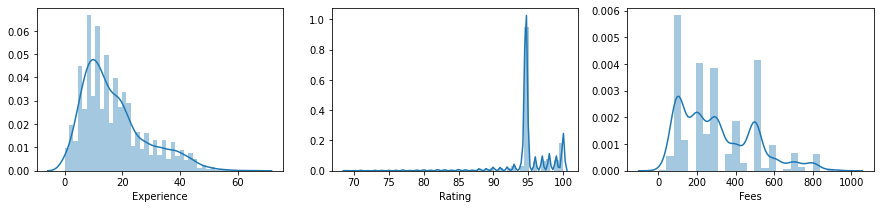

In [35]:
plt.figure(figsize=(15,3))
for i,j in enumerate(arr):
    plt.subplot(1,3,i+1)
    sns.distplot(df[j])
plt.show()

Experience is a bit positively skewed, Rating is quite negatively skewed and Fees seems pretty normal.

In [36]:
df.skew()

Experience    0.997788
Rating       -2.649242
Fees          0.760750
dtype: float64

We tried trasforming using log and square root but the skewness increased, let's keep it as is.

95 rating is the maximum case in our dataset as it is very high peak.

<Figure size 1440x432 with 0 Axes>

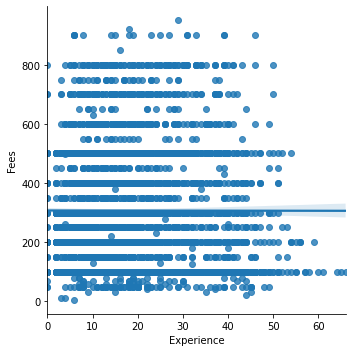

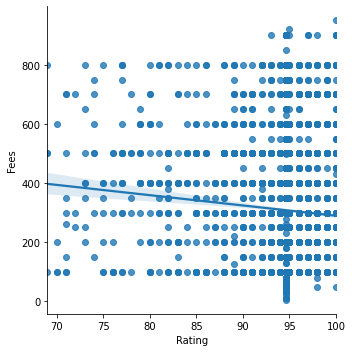

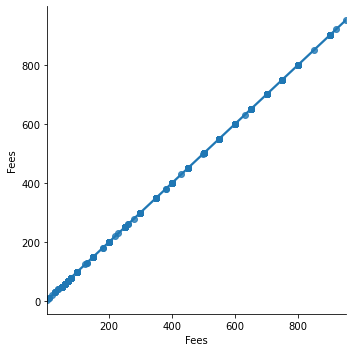

In [37]:
plt.figure(figsize=(20,6))
for i,j in enumerate(arr):
    sns.lmplot(x=j, y ='Fees', data=df)
plt.show()

Experience and Fees does not seems to relate at all.

While as Rating is increased Fees seems to decrease which is quite opposite.

# Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()

We can't do One hot encoding as there are huge number of unique values in each categorical values

In [39]:
arrObj = []
for i in df.columns:
    if df[i].dtype == 'object':
        arrObj.append(i)
arrObj

['Qualification', 'Profile']

In [40]:
for i in arrObj:
    df[i] = le.fit_transform(df[[i]])
df.head()

,Qualification,Experience,Rating,Profile,Fees
0,400,24,100.000000,5,100
1,73,12,98.000000,0,350
2,1127,9,94.643475,3,300
3,463,12,94.643475,0,250
4,10,20,100.000000,0,250


In [41]:
df.describe()

,Qualification,Experience,Rating,Profile,Fees
count,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,590.881218,17.223519,94.957996,2.435871,306.862606
std,411.432504,11.101706,3.875720,1.661750,190.439729
min,0.000000,0.000000,69.000000,0.000000,5.000000
25%,218.000000,9.000000,94.643475,1.000000,150.000000
50%,592.000000,14.000000,94.643475,2.000000,300.000000
75%,938.000000,23.000000,96.000000,4.000000,500.000000
max,1410.000000,66.000000,100.000000,5.000000,950.000000


# Data Scaling

In [42]:
mms = MinMaxScaler()

In [43]:
df.corr()

,Qualification,Experience,Rating,Profile,Fees
Qualification,1.000000,0.131170,-0.157541,0.393044,0.261486
Experience,0.131170,1.000000,-0.172829,0.200340,-0.000975
Rating,-0.157541,-0.172829,1.000000,-0.115749,-0.070797
Profile,0.393044,0.200340,-0.115749,1.000000,0.144005
Fees,0.261486,-0.000975,-0.070797,0.144005,1.000000


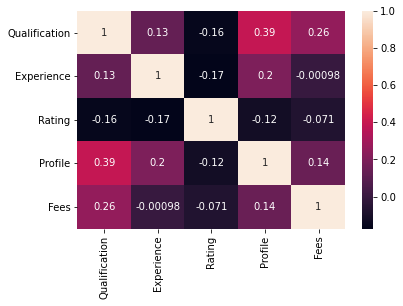

In [44]:
sns.heatmap(df.corr(), annot=True)

We have Qualification and Profile having positive correlation with Fees

We have Experience and Rating having negative correlation with Fees.

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X = df.drop("Fees",1)
Y = df['Fees']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

In [46]:
df.sample(5)

,Qualification,Experience,Rating,Profile,Fees
1615,350,9,94.643475,5,100
2880,772,24,99.000000,3,100
5391,1225,15,99.000000,2,700
2484,400,14,94.643475,5,150
4918,1154,12,94.000000,4,500


In [47]:
arr1 = ['Qualification', 'Experience', 'Rating']
for i in arr1:
    X[i] = mms.fit_transform(df[[i]])

In [48]:
X.describe()

,Qualification,Experience,Rating,Profile
count,5910.000000,5910.000000,5910.000000,5910.000000
mean,0.419065,0.260962,0.837355,2.435871
std,0.291796,0.168208,0.125023,1.661750
min,0.000000,0.000000,0.000000,0.000000
25%,0.154610,0.136364,0.827209,1.000000
50%,0.419858,0.212121,0.827209,2.000000
75%,0.665248,0.348485,0.870968,4.000000
max,1.000000,1.000000,1.000000,5.000000


In [49]:
#Models Import
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Metrics Import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
def classify(model, x, y):
    # Model training
    model.fit(x, y)
    pred = model.predict(x)
    print("MSE is:",mean_squared_error(y,pred))
    #Cross validation
    score = cross_val_score(model, x,y, cv=5)
    print("Cross validation score is :",np.abs(np.mean(score)))
    return np.abs(np.mean(score))

In [51]:
#Regression
lm = LinearRegression()
rr = Ridge()
ls = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

#Regression Parameters
rrparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': range(70,150)}
lsparams = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0], 'random_state': range(70,150)}
dtrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'min_samples_split' : range(10),
            'random_state' : range(70,150)}
rfrparams = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'], 'n_estimators' : range(50,80),
             'random_state' : range(70,150)}
etrparams = {'criterion' : ['mse', 'friedman_mse', 'mae'], 'min_samples_split' : range(10),
            'random_state' : range(70,150)}
gbrparams = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators' : range(50,80),
             'criterion' : ['mse', 'friedman_mse', 'mae'], 'random_state' : range(70,150)}

In [52]:
def rstate(model, X, Y):
    mse = []
    for i in range(1,201):
        X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=i)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        #print(mean_squared_error(y_test, pred))
        #print(np.sqrt(mean_squared_error(y_test, pred)))
        #print(mean_absolute_error(y_test, pred))
        #print(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred))
    return mse.index(min(mse))+1

In [53]:
lmRS = rstate(lm, X, Y)
print("Linear Model best random state is: ",lmRS)

Linear Model best random state is:  172


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=172)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

30818.907406610164
0.06719456036557858


In [55]:
rrgs = RandomizedSearchCV(rr, rrparams, return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
rrgs.fit(X, Y)
rrDF = pd.DataFrame(rrgs.cv_results_)
rrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

,params,mean_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_test_r2,rank_test_r2
99,"{'random_state': 76, 'alpha': 1.0}",-33657.114473,1,0.071342,1
81,"{'random_state': 119, 'alpha': 1.0}",-33657.114473,1,0.071342,1
32,"{'random_state': 81, 'alpha': 1.0}",-33657.114473,1,0.071342,1
45,"{'random_state': 146, 'alpha': 1.0}",-33657.114473,1,0.071342,1
49,"{'random_state': 104, 'alpha': 1.0}",-33657.114473,1,0.071342,1
...,...,...,...,...,...
77,"{'random_state': 80, 'alpha': 0.0001}",-33657.366560,79,0.071335,79
61,"{'random_state': 93, 'alpha': 0.0001}",-33657.366560,79,0.071335,79
63,"{'random_state': 132, 'alpha': 0.0001}",-33657.366560,79,0.071335,79
66,"{'random_state': 129, 'alpha': 0.0001}",-33657.366560,79,0.071335,79


In [56]:
model_score_table = pd.DataFrame(columns=['Model Name','Params', 'MSE Score', 'R2 Score'])

In [57]:
i = list(rrDF['mean_test_neg_mean_squared_error']).index(rrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[0] = ["Ridge Regressor", rrDF['params'][i], rrDF['mean_test_neg_mean_squared_error'][i], rrDF['mean_test_r2'][i]]
model_score_table

,Model Name,Params,MSE Score,R2 Score
0,Ridge Regressor,"{'random_state': 74, 'alpha': 1.0}",-33657.114473,0.071342


In [58]:
lsgs = RandomizedSearchCV(ls, lsparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
lsgs.fit(X, Y)
lsDF = pd.DataFrame(lsgs.cv_results_)
lsDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

,params,mean_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_test_r2,rank_test_r2
17,"{'random_state': 89, 'alpha': 0.01}",-33657.342656,1,0.071336,1
67,"{'random_state': 123, 'alpha': 0.01}",-33657.342656,1,0.071336,1
39,"{'random_state': 119, 'alpha': 0.01}",-33657.342656,1,0.071336,1
40,"{'random_state': 144, 'alpha': 0.01}",-33657.342656,1,0.071336,1
43,"{'random_state': 114, 'alpha': 0.01}",-33657.342656,1,0.071336,1
...,...,...,...,...,...
62,"{'random_state': 77, 'alpha': 1.0}",-33743.775176,76,0.068971,76
18,"{'random_state': 107, 'alpha': 1.0}",-33743.775176,76,0.068971,76
65,"{'random_state': 86, 'alpha': 1.0}",-33743.775176,76,0.068971,76
66,"{'random_state': 133, 'alpha': 1.0}",-33743.775176,76,0.068971,76


In [59]:
i = list(lsDF['mean_test_neg_mean_squared_error']).index(lsDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[1] = ["Lasso Regressor", lsDF['params'][i], lsDF['mean_test_neg_mean_squared_error'][i], lsDF['mean_test_r2'][i]]
model_score_table

,Model Name,Params,MSE Score,R2 Score
0,Ridge Regressor,"{'random_state': 74, 'alpha': 1.0}",-33657.114473,0.071342
1,Lasso Regressor,"{'random_state': 87, 'alpha': 0.01}",-33657.342656,0.071336


In [60]:
dtrgs = RandomizedSearchCV(dtr, dtrparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
dtrgs.fit(X, Y)
dtrDF = pd.DataFrame(dtrgs.cv_results_)
dtrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

,params,mean_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_test_r2,rank_test_r2
76,"{'random_state': 110, 'min_samples_split': 9, ...",-44143.676311,1,-0.217829,1
62,"{'random_state': 125, 'min_samples_split': 9, ...",-44445.512183,2,-0.227307,2
4,"{'random_state': 90, 'min_samples_split': 9, '...",-44481.404738,3,-0.227920,3
41,"{'random_state': 82, 'min_samples_split': 9, '...",-44838.460575,4,-0.238490,4
50,"{'random_state': 134, 'min_samples_split': 9, ...",-45320.084941,5,-0.250884,5
...,...,...,...,...,...
89,"{'random_state': 82, 'min_samples_split': 1, '...",NaN,68,NaN,68
93,"{'random_state': 107, 'min_samples_split': 7, ...",NaN,72,NaN,72
94,"{'random_state': 86, 'min_samples_split': 7, '...",NaN,73,NaN,73
96,"{'random_state': 146, 'min_samples_split': 9, ...",NaN,74,NaN,74


In [61]:
i = list(dtrDF['mean_test_neg_mean_squared_error']).index(dtrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[2] = ["Decision Tree Regressor", dtrDF['params'][i], dtrDF['mean_test_neg_mean_squared_error'][i], dtrDF['mean_test_r2'][i]]
model_score_table

,Model Name,Params,MSE Score,R2 Score
0,Ridge Regressor,"{'random_state': 74, 'alpha': 1.0}",-33657.114473,0.071342
1,Lasso Regressor,"{'random_state': 87, 'alpha': 0.01}",-33657.342656,0.071336
2,Decision Tree Regressor,"{'random_state': 110, 'min_samples_split': 9, ...",-44143.676311,-0.217829


In [62]:
rfrgs = RandomizedSearchCV(rfr, rfrparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
rfrgs.fit(X, Y)
rfrDF = pd.DataFrame(rfrgs.cv_results_)
rfrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

,params,mean_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_test_r2,rank_test_r2
16,"{'random_state': 84, 'n_estimators': 73, 'crit...",-34336.560911,1,0.052164,1
23,"{'random_state': 87, 'n_estimators': 75, 'crit...",-34371.214867,2,0.051005,2
80,"{'random_state': 110, 'n_estimators': 57, 'cri...",-34456.510627,3,0.048798,3
35,"{'random_state': 119, 'n_estimators': 74, 'cri...",-34471.904353,5,0.048351,4
46,"{'random_state': 102, 'n_estimators': 59, 'cri...",-34471.032946,4,0.048337,5
...,...,...,...,...,...
89,"{'random_state': 99, 'n_estimators': 55, 'crit...",NaN,81,NaN,82
92,"{'random_state': 106, 'n_estimators': 68, 'cri...",NaN,77,NaN,79
93,"{'random_state': 142, 'n_estimators': 51, 'cri...",NaN,76,NaN,78
95,"{'random_state': 122, 'n_estimators': 74, 'cri...",NaN,78,NaN,77


In [63]:
i = list(rfrDF['mean_test_neg_mean_squared_error']).index(rfrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[3] = ["Random Forest Regressor", rfrDF['params'][i], rfrDF['mean_test_neg_mean_squared_error'][i], rfrDF['mean_test_r2'][i]]
model_score_table

,Model Name,Params,MSE Score,R2 Score
0,Ridge Regressor,"{'random_state': 74, 'alpha': 1.0}",-33657.114473,0.071342
1,Lasso Regressor,"{'random_state': 87, 'alpha': 0.01}",-33657.342656,0.071336
2,Decision Tree Regressor,"{'random_state': 110, 'min_samples_split': 9, ...",-44143.676311,-0.217829
3,Random Forest Regressor,"{'random_state': 84, 'n_estimators': 73, 'crit...",-34336.560911,0.052164


In [64]:
etrgs = RandomizedSearchCV(etr, etrparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
etrgs.fit(X, Y)
etrDF = pd.DataFrame(etrgs.cv_results_)
etrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

,params,mean_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_test_r2,rank_test_r2
17,"{'random_state': 85, 'min_samples_split': 9, '...",-32588.066107,1,0.100557,1
90,"{'random_state': 86, 'min_samples_split': 9, '...",-32637.750863,2,0.099145,2
14,"{'random_state': 128, 'min_samples_split': 9, ...",-32766.994389,3,0.095633,3
77,"{'random_state': 123, 'min_samples_split': 9, ...",-32800.500225,4,0.094707,4
87,"{'random_state': 77, 'min_samples_split': 8, '...",-32874.247492,5,0.092596,5
...,...,...,...,...,...
71,"{'random_state': 88, 'min_samples_split': 0, '...",NaN,91,NaN,91
79,"{'random_state': 139, 'min_samples_split': 0, ...",NaN,93,NaN,93
80,"{'random_state': 109, 'min_samples_split': 1, ...",NaN,99,NaN,99
81,"{'random_state': 144, 'min_samples_split': 1, ...",NaN,83,NaN,83


In [65]:
i = list(etrDF['mean_test_neg_mean_squared_error']).index(etrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[4] = ["Extra Trees Regressor", etrDF['params'][i], etrDF['mean_test_neg_mean_squared_error'][i], etrDF['mean_test_r2'][i]]
model_score_table

,Model Name,Params,MSE Score,R2 Score
0,Ridge Regressor,"{'random_state': 74, 'alpha': 1.0}",-33657.114473,0.071342
1,Lasso Regressor,"{'random_state': 87, 'alpha': 0.01}",-33657.342656,0.071336
2,Decision Tree Regressor,"{'random_state': 110, 'min_samples_split': 9, ...",-44143.676311,-0.217829
3,Random Forest Regressor,"{'random_state': 84, 'n_estimators': 73, 'crit...",-34336.560911,0.052164
4,Extra Trees Regressor,"{'random_state': 85, 'min_samples_split': 9, '...",-32588.066107,0.100557


In [66]:
gbrgs = RandomizedSearchCV(gbr, gbrparams,return_train_score = False, n_iter=100, cv = 5, scoring=['neg_mean_squared_error', 'r2'], refit='neg_mean_squared_error')
gbrgs.fit(X, Y)
gbrDF = pd.DataFrame(gbrgs.cv_results_)
gbrDF[['params', 'mean_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False)

,params,mean_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_test_r2,rank_test_r2
12,"{'random_state': 93, 'n_estimators': 54, 'loss...",-30460.024952,1,0.159483,1
46,"{'random_state': 85, 'n_estimators': 75, 'loss...",-30464.121906,2,0.159384,2
86,"{'random_state': 137, 'n_estimators': 56, 'los...",-30465.620673,3,0.159343,3
74,"{'random_state': 93, 'n_estimators': 60, 'loss...",-30467.641192,4,0.159311,4
36,"{'random_state': 92, 'n_estimators': 71, 'loss...",-30468.743001,5,0.159264,5
...,...,...,...,...,...
98,"{'random_state': 92, 'n_estimators': 67, 'loss...",-100361.928596,96,-1.770602,96
59,"{'random_state': 102, 'n_estimators': 75, 'los...",-100449.757591,97,-1.773057,97
29,"{'random_state': 76, 'n_estimators': 78, 'loss...",-100483.113417,98,-1.773998,98
65,"{'random_state': 109, 'n_estimators': 78, 'los...",-100483.113417,98,-1.773998,98


In [67]:
i = list(gbrDF['mean_test_neg_mean_squared_error']).index(gbrDF['mean_test_neg_mean_squared_error'].max())
model_score_table.loc[5] = ["Gradient Boost Regressor", gbrDF['params'][i], gbrDF['mean_test_neg_mean_squared_error'][i], gbrDF['mean_test_r2'][i]]
model_score_table

,Model Name,Params,MSE Score,R2 Score
0,Ridge Regressor,"{'random_state': 74, 'alpha': 1.0}",-33657.114473,0.071342
1,Lasso Regressor,"{'random_state': 87, 'alpha': 0.01}",-33657.342656,0.071336
2,Decision Tree Regressor,"{'random_state': 110, 'min_samples_split': 9, ...",-44143.676311,-0.217829
3,Random Forest Regressor,"{'random_state': 84, 'n_estimators': 73, 'crit...",-34336.560911,0.052164
4,Extra Trees Regressor,"{'random_state': 85, 'min_samples_split': 9, '...",-32588.066107,0.100557
5,Gradient Boost Regressor,"{'random_state': 93, 'n_estimators': 54, 'loss...",-30460.024952,0.159483


In [68]:
model_score_table.sort_values(by="R2 Score", ascending=False)

,Model Name,Params,MSE Score,R2 Score
5,Gradient Boost Regressor,"{'random_state': 93, 'n_estimators': 54, 'loss...",-30460.024952,0.159483
4,Extra Trees Regressor,"{'random_state': 85, 'min_samples_split': 9, '...",-32588.066107,0.100557
0,Ridge Regressor,"{'random_state': 74, 'alpha': 1.0}",-33657.114473,0.071342
1,Lasso Regressor,"{'random_state': 87, 'alpha': 0.01}",-33657.342656,0.071336
3,Random Forest Regressor,"{'random_state': 84, 'n_estimators': 73, 'crit...",-34336.560911,0.052164
2,Decision Tree Regressor,"{'random_state': 110, 'min_samples_split': 9, ...",-44143.676311,-0.217829


Gradient Boost Regressor is the best performing model

In [69]:
#Parameters of the Gradient Boosting Regression
model_score_table['Params'][5]

{'random_state': 93,
 'n_estimators': 54,
 'loss': 'ls',
 'criterion': 'friedman_mse'}

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=93)
gbr_model = GradientBoostingRegressor(random_state = 93, n_estimators = 54, loss = 'ls', criterion = 'friedman_mse')
gbr_model.fit(X_train, y_train)
pred = gbr_model.predict(X_test)
pred = pd.DataFrame(pred)
pred

,0
0,374.851849
1,288.183598
2,232.926111
3,333.581806
4,243.280288
...,...
1473,400.170585
1474,407.017403
1475,395.143131
1476,380.623534


In [87]:
gbr_model.score(X_train,y_train)

0.19776480053121337

In [88]:
gbr_model.score(X_test,y_test)

0.1597486899201459

In [89]:
print(mean_squared_error(y_test , pred))
print(mean_absolute_error(y_test , pred))

32165.345884855044
142.3453901177057


In [96]:
dftest = pd.read_excel('Doctor_Test.xlsx')
dftest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [97]:
dftest.drop("Miscellaneous_Info",1,inplace=True)

In [98]:
dftest['ExperienceSplit'] = dftest['Experience'].str.split(" ", n = -1, expand = True)[0]
dftest['ExperienceSplit']

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: ExperienceSplit, Length: 1987, dtype: object

In [99]:
#Dropping the unwanted values to keep only numeric value in column Experience
dftest['Experience'] = dftest['ExperienceSplit']
dftest.drop("ExperienceSplit",1,inplace=True)
dftest['Experience']

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: object

In [100]:
#Dropping the '%' symbol to keep only numeric value in column Rating
dftest['Rating'] = dftest['Rating'].str.replace(r'\D', '')
dftest['Rating']

0       NaN
1       NaN
2        70
3       NaN
4       100
       ... 
1982    NaN
1983    NaN
1984    NaN
1985     98
1986    NaN
Name: Rating, Length: 1987, dtype: object

In [101]:
#Converting the Experience data type to integer
dftest['Experience'] = dftest['Experience'].astype('int64')

In [102]:
#Converting the Rating data type to float
dftest['Rating'] = dftest['Rating'].astype('float64')

In [103]:
#Replacing the NaN values in Rating with the mean value of itself
dftest.loc[dftest['Rating'].isnull(), 'Rating'] = dftest['Rating'].mean()

In [104]:
#Drop Place
dftest.drop("Place",1,inplace=True)

In [105]:
dftest['RatingZscore'] = zscore(dftest['Rating'])
dftest['RatingZscore']

0       0.000000
1       0.000000
2      -4.803364
3       0.000000
4       1.092391
          ...   
1982    0.000000
1983    0.000000
1984    0.000000
1985    0.699340
1986    0.000000
Name: RatingZscore, Length: 1987, dtype: float64

In [106]:
dftest['RatingZscore'].max()

1.092390687006677

In [107]:
dftest['RatingZscore'].min()

-8.340816978408371

In [108]:
dftest.loc[dftest['RatingZscore'] < -5, 'RatingZscore'].count()

17

In [109]:
dftest_New = dftest[dftest['RatingZscore'] > -5]

In [110]:
dftest = dftest_New.copy()

In [111]:
dftest.drop("RatingZscore",1,inplace=True)

In [112]:
for i in arrObj:
    dftest[i] = le.fit_transform(dftest[[i]])
dftest.head()

,Qualification,Experience,Rating,Profile
0,238,35,94.441472,4
1,337,31,94.441472,3
2,255,40,70.000000,2
3,6,0,94.441472,0
4,78,16,100.000000,1


In [114]:
arr1 = ['Qualification', 'Experience', 'Rating']
for i in arr1:
    dftest[i] = mms.fit_transform(dftest[[i]])

In [115]:
X.head()

,Qualification,Experience,Rating,Profile
0,0.283688,0.363636,1.000000,5
1,0.051773,0.181818,0.935484,0
2,0.799291,0.136364,0.827209,3
3,0.328369,0.181818,0.827209,0
4,0.007092,0.303030,1.000000,0


In [116]:
dftest.head()

,Qualification,Experience,Rating,Profile
0,0.382022,0.538462,0.820693,4
1,0.540931,0.476923,0.820693,3
2,0.409310,0.615385,0.032258,2
3,0.009631,0.000000,0.820693,0
4,0.125201,0.246154,1.000000,1


In [117]:
pred = gbr_model.predict(dftest)
pred = pd.DataFrame(pred)
pred

,0
0,257.016166
1,365.228051
2,171.689768
3,174.544366
4,268.149296
...,...
1965,215.725088
1966,383.873743
1967,353.475373
1968,237.235897


In [118]:
import joblib

In [119]:
# save the model to disk
filename = 'final_model.pkl'
joblib.dump(gbr_model, filename)

['final_model.pkl']

In [120]:
# load the model from disk
load_model = joblib.load(filename)
result = load_model.score(X_test, y_test)
print(result)

0.1597486899201459


In [121]:
pred = load_model.predict(dftest)
pred

array([257.01616638, 365.22805104, 171.68976783, ..., 353.47537282,
       237.23589669, 376.04207578])